In [45]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (4).csv


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster





In [47]:
data = pd.read_csv(r'crime_data.csv')

In [48]:
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [49]:
data = data.rename(columns={'Unnamed: 0': 'Place'})

In [50]:
data.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='object':
        colname.append(x)
colname        


['Place']

In [52]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Place
mapping {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New Hampshire': 28, 'New Jersey': 29, 'New Mexico': 30, 'New York': 31, 'North Carolina': 32, 'North Dakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'Rhode Island': 38, 'South Carolina': 39, 'South Dakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'West Virginia': 47, 'Wisconsin': 48, 'Wyoming': 49}


In [53]:
data.shape

(50, 5)

In [54]:
data.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [55]:
data.dtypes

Place         int64
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

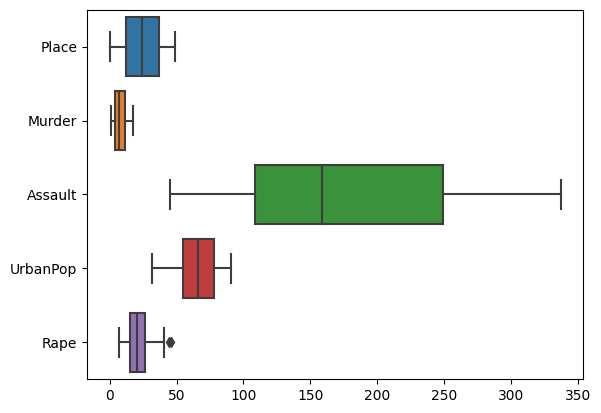

In [56]:
sns.boxplot(data=data, orient="h")
plt.show()

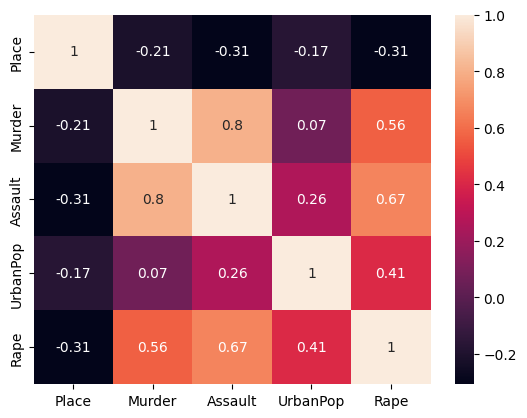

In [57]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     int64  
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


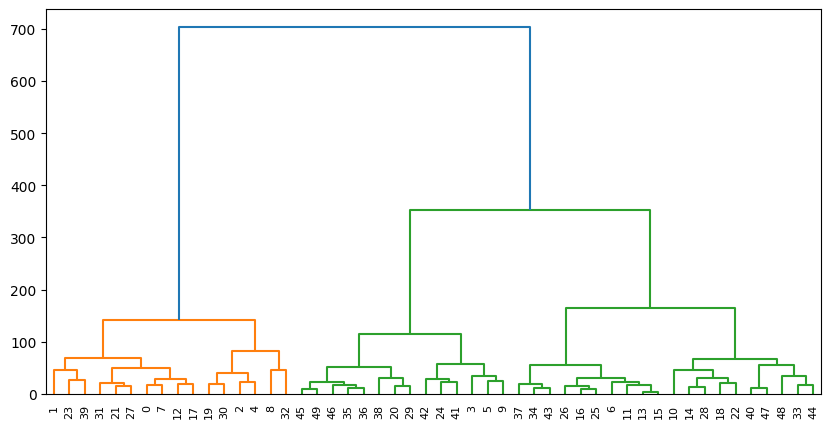

In [59]:
df = data
# Create a dendrogram to visualize the hierarchy of the clusters
Z = linkage(df, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()


In [60]:
# Based on the dendrogram, we can see that 3 clusters may be optimal
max_d = 800
clusters = fcluster(Z, max_d, criterion='distance')
df['hierarchical_cluster'] = clusters

In [61]:
# Calculate the mean values of each variable within each cluster
cluster_means = df.groupby('hierarchical_cluster').mean()


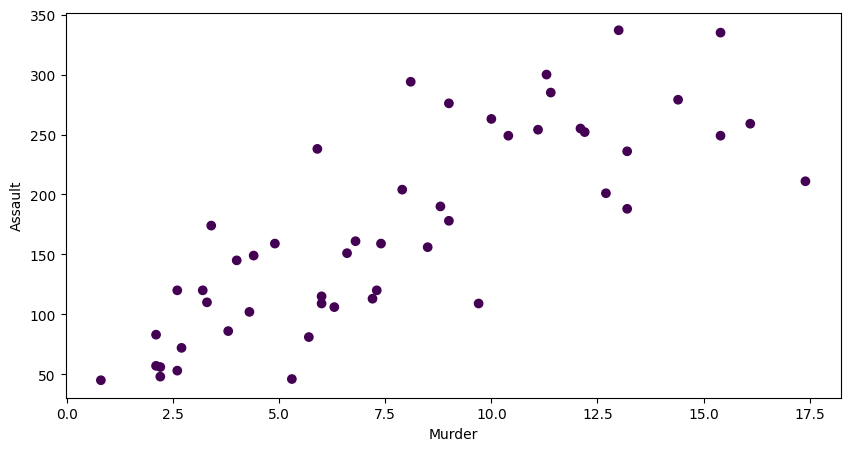

In [62]:
# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['Murder'], df['Assault'], c=df['hierarchical_cluster'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

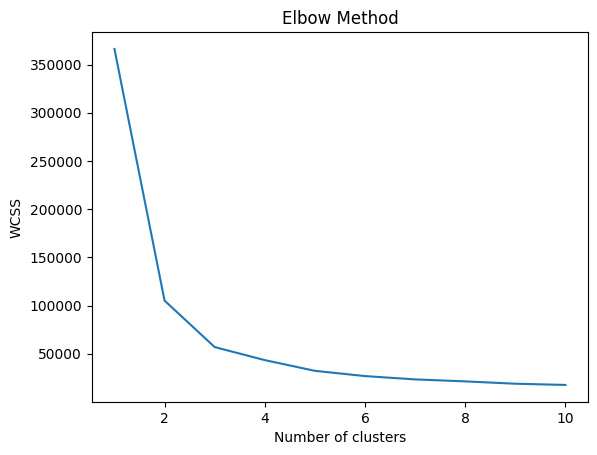

In [63]:
# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# Based on the elbow plot, we can see that 4 clusters may be optimal
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)
df['kmeans_cluster'] = kmeans.labels_

In [65]:
# Calculate the mean values of each variable within each cluster
cluster_means = df.groupby('kmeans_cluster').mean()


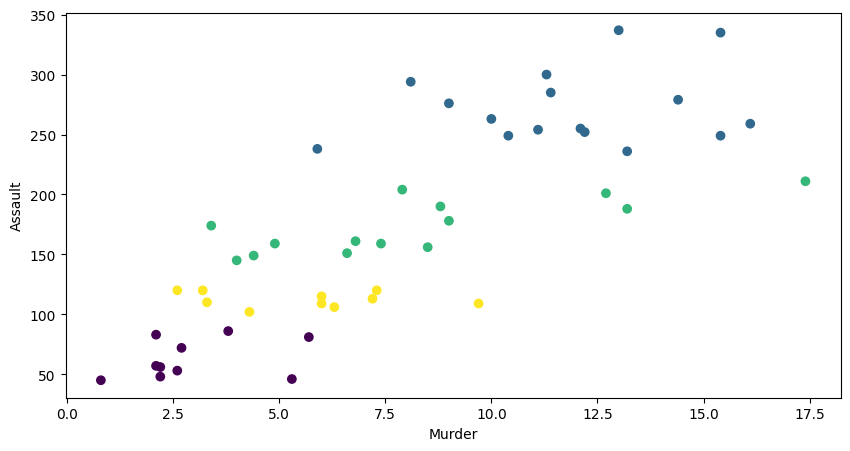

In [66]:

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['Murder'], df['Assault'], c=df['kmeans_cluster'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()
